In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import wordcloud
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [2]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
missing_data = movies.isna()

if missing_data.any(axis=None):
    plt.figure(figsize=(8, 6))
    sns.heatmap(missing_data, cbar=False, cmap='viridis')
    plt.title("Missing Values in Movies Dataset")
    plt.show()
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


In [7]:
corr_matrix = ratings.corr()
print(corr_matrix)


             userId   movieId    rating  timestamp
userId     1.000000  0.006773 -0.049348   0.097151
movieId    0.006773  1.000000 -0.004061   0.503669
rating    -0.049348 -0.004061  1.000000  -0.005802
timestamp  0.097151  0.503669 -0.005802   1.000000


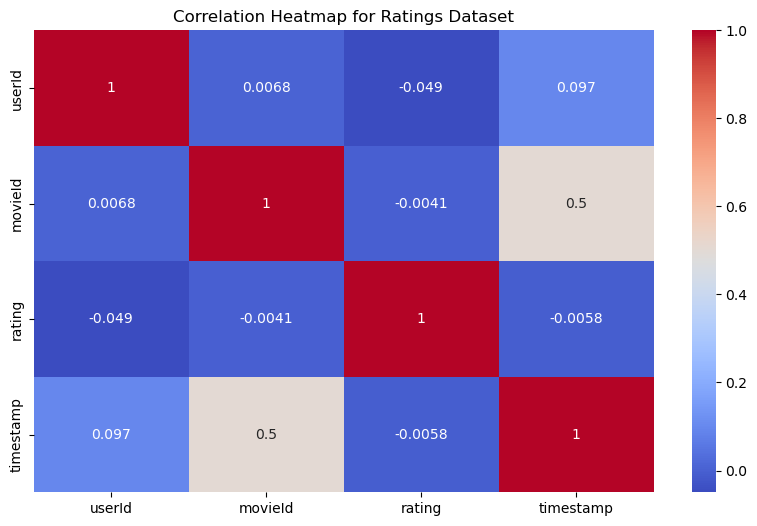

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(ratings.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Ratings Dataset")
plt.show()


/tmp/ipykernel_284/3334727797.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  genre_movies = movies[movies['genres'].str.contains(genre)]


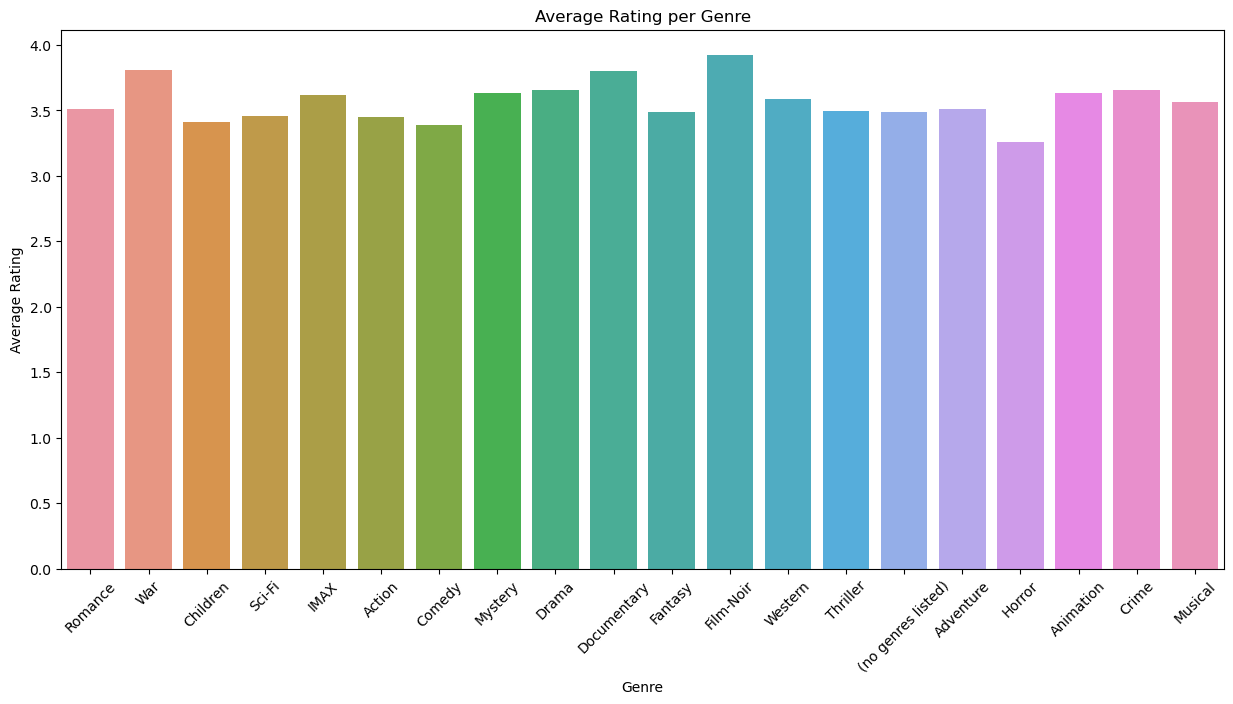

In [9]:
all_genres = [s.split('|') for s in movies['genres'].tolist()]
all_genres = [item for sublist in all_genres for item in sublist]

unique_genres = set(all_genres)

genre_ratings = {}
for genre in unique_genres:
    genre_movies = movies[movies['genres'].str.contains(genre)]
    avg_rating = ratings[ratings['movieId'].isin(genre_movies['movieId'])]['rating'].mean()
    genre_ratings[genre] = avg_rating

plt.figure(figsize=(15, 7))
sns.barplot(x=list(genre_ratings.keys()), y=list(genre_ratings.values()))
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating per Genre')
plt.show()

In [10]:
avg_ratings_per_movie = ratings.groupby('movieId')['rating'].mean()
movie_ratings_df = pd.DataFrame({'movieId': avg_ratings_per_movie.index, 'avg_rating': avg_ratings_per_movie.values})
lowest_rated_movies_with_names = movie_ratings_df.merge(movies[['movieId', 'title']], on='movieId')
lowest_rated_movies_with_names = lowest_rated_movies_with_names.sort_values(by='avg_rating')

print("10 Lowest-Rated Movies:")
for index, row in lowest_rated_movies_with_names.head(10).iterrows():
    print(f"{row['title']} - Average Rating: {row['avg_rating']}")


10 Lowest-Rated Movies:
Lionheart (1990) - Average Rating: 0.5
Gypsy (1962) - Average Rating: 0.5
Follow Me, Boys! (1966) - Average Rating: 0.5
Idaho Transfer (1973) - Average Rating: 0.5
Case 39 (2009) - Average Rating: 0.5
Bloodsport: The Dark Kumite (1999) - Average Rating: 0.5
Hard Ticket to Hawaii (1987) - Average Rating: 0.5
Superfast! (2015) - Average Rating: 0.5
Yongary: Monster from the Deep (1967) - Average Rating: 0.5
The Emoji Movie (2017) - Average Rating: 0.5


In [11]:
movie_ratings_df = pd.DataFrame({'movieId': avg_ratings_per_movie.index, 'avg_rating': avg_ratings_per_movie.values})
highest_rated_movies_with_names = movie_ratings_df.merge(movies[['movieId', 'title']], on='movieId')
highest_rated_movies_with_names = highest_rated_movies_with_names.sort_values(by='avg_rating', ascending=False)

print("10 Highest-Rated Movies:")
for index, row in highest_rated_movies_with_names.head(10).iterrows():
    print(f"{row['title']} - Average Rating: {row['avg_rating']}")



10 Highest-Rated Movies:
Paper Birds (Pájaros de papel) (2010) - Average Rating: 5.0
Act of Killing, The (2012) - Average Rating: 5.0
Jump In! (2007) - Average Rating: 5.0
Human (2015) - Average Rating: 5.0
L.A. Slasher (2015) - Average Rating: 5.0
Lady Jane (1986) - Average Rating: 5.0
Bill Hicks: Revelations (1993) - Average Rating: 5.0
Justice League: Doom (2012)  - Average Rating: 5.0
Open Hearts (Elsker dig for evigt) (2002) - Average Rating: 5.0
Formula of Love (1984) - Average Rating: 5.0


In [12]:
user_ratings_count = ratings['userId'].value_counts()
most_active_user = user_ratings_count.idxmax()
max_ratings = user_ratings_count.max()

print(f"The most actively engaged user is User ID {most_active_user} with {max_ratings} ratings.")


The most actively engaged user is User ID 414 with 2698 ratings.


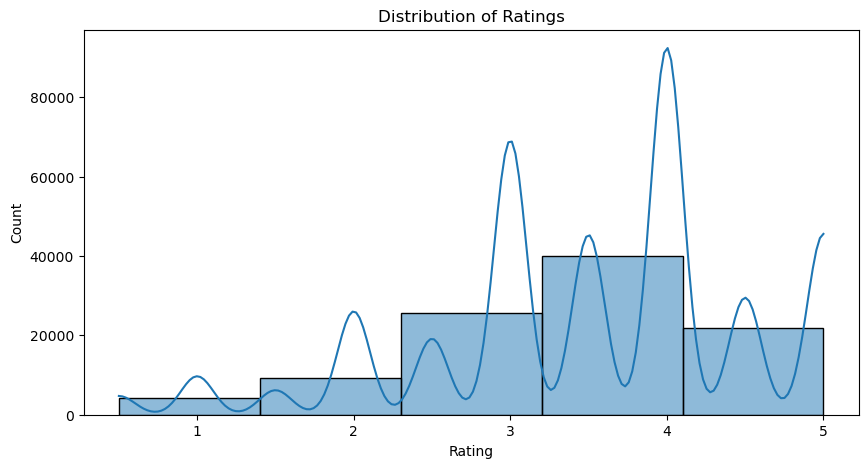

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(ratings['rating'], bins=5, kde=True)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

In [14]:
sampled_ratings = ratings.sample(n=5000) 

aggregated_data = ratings['rating'].value_counts().reset_index()
aggregated_data.columns = ['Rating', 'Count']


chart = alt.Chart(aggregated_data).mark_bar().encode(
    alt.X('Rating:O', title='Rating'),
    alt.Y('Count:Q', title='Count'),
).properties(
    width=400,
    height=300,
    title='Distribution of Ratings'
)

chart

/opt/conda/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

Plot to show the popularity of all genres over the years

/tmp/ipykernel_284/2062018801.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  genre_count = movies[(movies['year'] == year) & (movies['genres'].str.contains(genre))].shape[0]


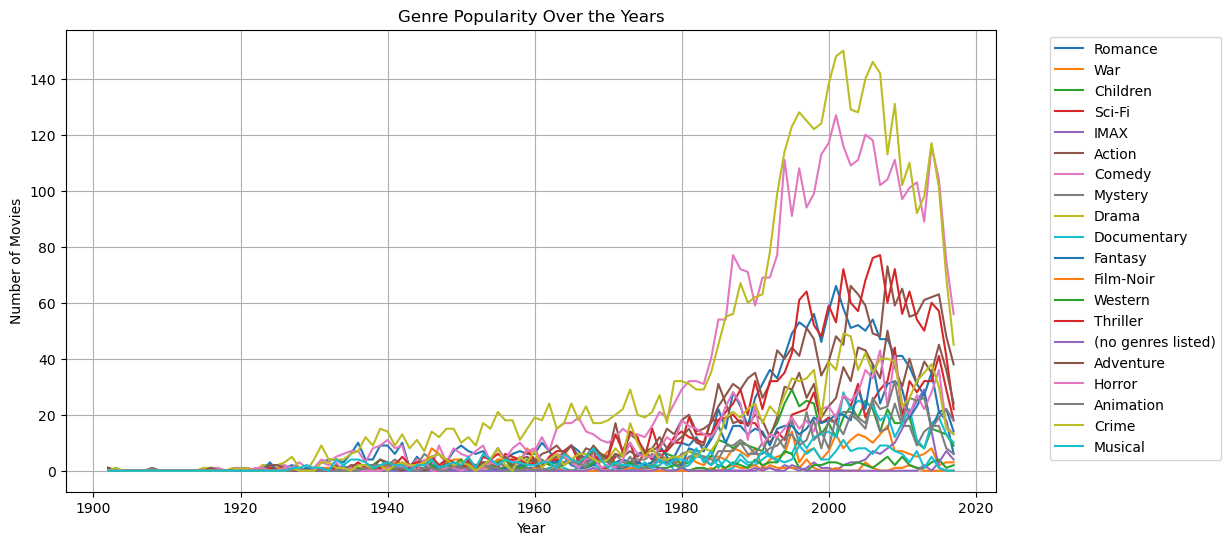

In [15]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies['year'].fillna(0, inplace=True)
movies['year'] = movies['year'].astype(int) 

genre_counts_by_year = {genre: [] for genre in unique_genres}
filtered_df = movies[movies['year'] > 0]
smallest_value_after_0 = filtered_df['year'].min()

for year in range(smallest_value_after_0, movies['year'].max()):  # Adjust the year range to match your dataset
    for genre in unique_genres:
        genre_count = movies[(movies['year'] == year) & (movies['genres'].str.contains(genre))].shape[0]
        genre_counts_by_year[genre].append(genre_count)

genre_counts_df = pd.DataFrame(genre_counts_by_year)

plt.figure(figsize=(12, 6))
for genre in unique_genres:
    plt.plot(range(smallest_value_after_0, movies['year'].max()), genre_counts_df[genre], label=genre)

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Genre Popularity Over the Years')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid()
plt.show()


Which genre peaked(highest rating) in each year

/tmp/ipykernel_284/2502769311.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  movies_in_year_and_genre = movies[(movies['year'] == year) & (movies['genres'].str.contains(genre))]


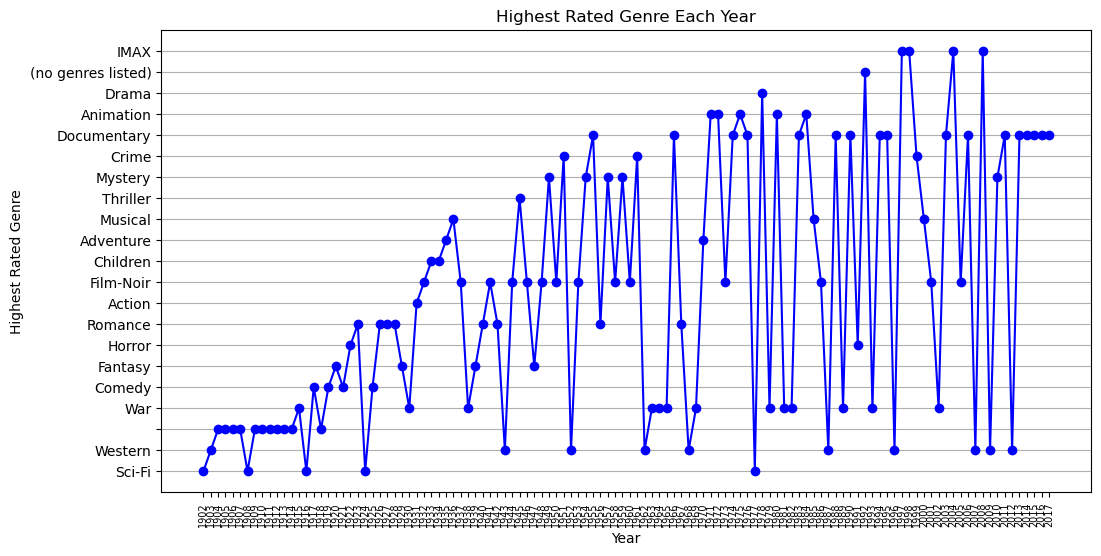

In [16]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies['year'].fillna(0, inplace=True)
movies['year'] = movies['year'].astype(int) 

highest_rated_genre_by_year = {year: '' for year in range(smallest_value_after_0, movies['year'].max())}  # Adjust the year range to match your dataset

for year in range(smallest_value_after_0, movies['year'].max()):
    max_avg_rating = -1
    max_avg_genre = ''
    for genre in unique_genres:
        movies_in_year_and_genre = movies[(movies['year'] == year) & (movies['genres'].str.contains(genre))]
        if not movies_in_year_and_genre.empty:
            avg_rating = ratings[ratings['movieId'].isin(movies_in_year_and_genre['movieId'])]['rating'].mean()
            if avg_rating > max_avg_rating:
                max_avg_rating = avg_rating
                max_avg_genre = genre
    highest_rated_genre_by_year[year] = max_avg_genre

highest_rated_genre_df = pd.DataFrame.from_dict(highest_rated_genre_by_year, orient='index', columns=['Highest Rated Genre'])

plt.figure(figsize=(12, 6))
plt.plot(highest_rated_genre_df.index, highest_rated_genre_df['Highest Rated Genre'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Highest Rated Genre')
plt.title('Highest Rated Genre Each Year')
plt.grid(axis='y')
plt.xticks(range(smallest_value_after_0, movies['year'].max()), rotation=90, fontsize=7)
plt.show()


a word cloud to visualize the most frequent words in movie titles

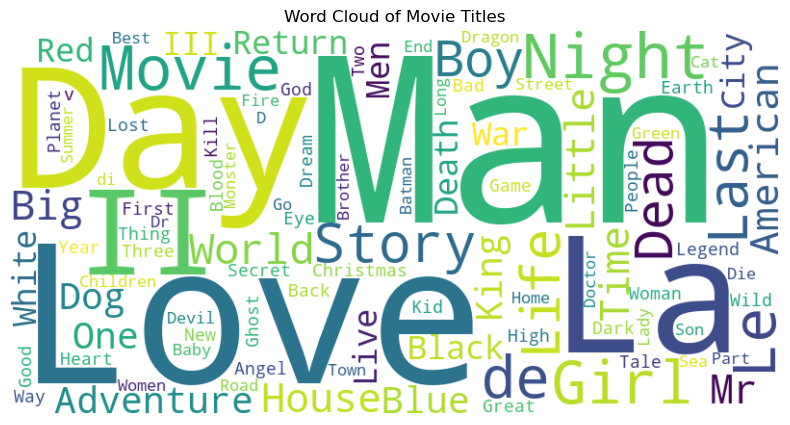

In [17]:
all_movie_titles = ' '.join(movies['title'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100).generate(all_movie_titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

a scatter plot to explore the relationship between a user's average rating and the number of ratings they have given:

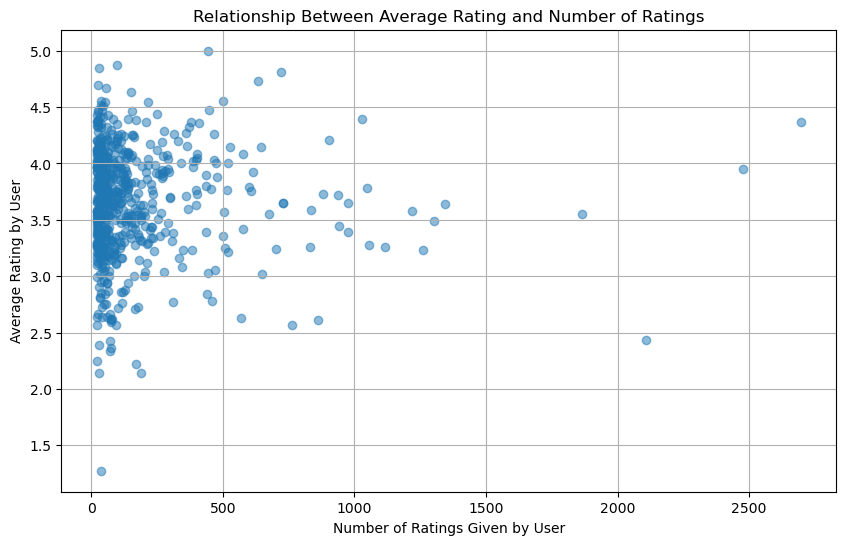

In [18]:
avg_rating_per_user = ratings.groupby('userId')['rating'].mean()

num_ratings_per_user = ratings['userId'].value_counts()

plt.figure(figsize=(10, 6))
plt.scatter(num_ratings_per_user, avg_rating_per_user, alpha=0.5)
plt.xlabel('Number of Ratings Given by User')
plt.ylabel('Average Rating by User')
plt.title('Relationship Between Average Rating and Number of Ratings')
plt.grid()
plt.show()

Insights:

Cluster of Users with Low Average Ratings and High Activity: In the bottom-left part of the graph, there may be a cluster of users who have given a large number of ratings but tend to give lower average ratings. This suggests that these users are active but critical in their ratings.

Cluster of Users with High Average Ratings and Low Activity: In the top-right part of the graph, there may be a cluster of users who have given fewer ratings but tend to give higher average ratings. These users might be more selective and generous in their ratings, possibly indicating that they only rate movies they really enjoy.

Diverse User Behavior: The scatter plot reveals that users exhibit a wide range of behaviors. Some users rate many movies with high scores, while others rate a large number of movies with lower scores. The diversity in user behavior is apparent.

Potential Outliers: Users who are far from the general trend might be considered outliers. These outliers can represent extreme cases, such as highly critical users who rate many movies very low or very enthusiastic users who rate everything highly.

Lack of Strong Correlation: The plot doesn't show a clear, strong correlation between the number of ratings and the average rating given by users. This suggests that user rating behavior is complex and not solely determined by activity level.

the number of ratings given by each user to understand user engagement and activity patterns

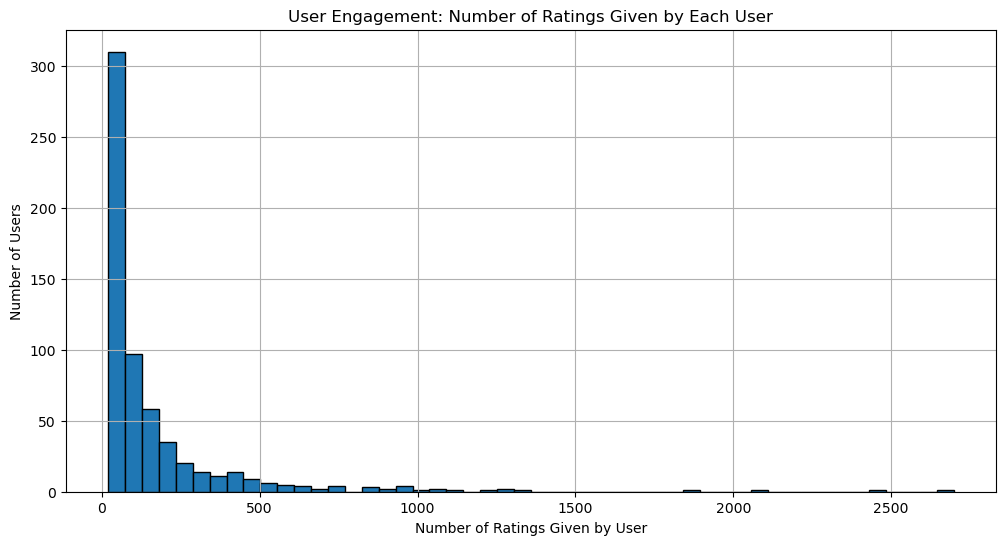

In [19]:
ratings_per_user = ratings['userId'].value_counts()

plt.figure(figsize=(12, 6))
plt.hist(ratings_per_user, bins=50, edgecolor='k')
plt.xlabel('Number of Ratings Given by User')
plt.ylabel('Number of Users')
plt.title('User Engagement: Number of Ratings Given by Each User')
plt.grid()
plt.show()

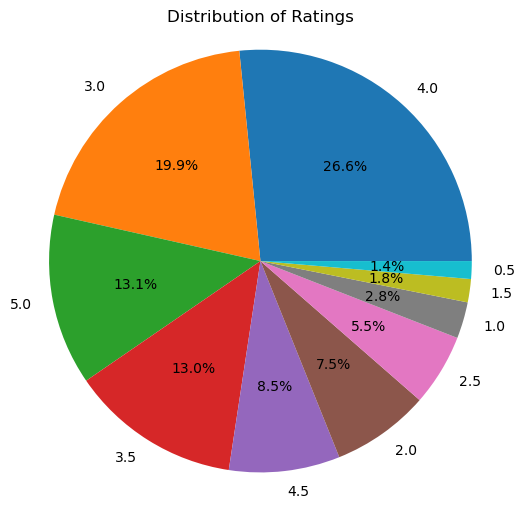

In [20]:
rating_counts = ratings['rating'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.show()

Outliers:
        userId  movieId  rating   timestamp  \
26          76        1     0.5  1439165548   
235        217        3     1.0   955944713   
242        294        3     1.0   966596854   
245        308        3     0.5  1421374465   
260        552        3     1.0  1111472953   
...        ...      ...     ...         ...   
100530     605    35347     1.0  1277096832   
100684     610     8840     1.0  1479542247   
100722     610    61818     0.5  1493848943   
100734     610    72424     0.5  1493849030   
100823     610   145951     0.5  1493849019   

                                         title  \
26                            Toy Story (1995)   
235                    Grumpier Old Men (1995)   
242                    Grumpier Old Men (1995)   
245                    Grumpier Old Men (1995)   
260                    Grumpier Old Men (1995)   
...                                        ...   
100530                      Animal Farm (1954)   
100684  Who's That Knocki

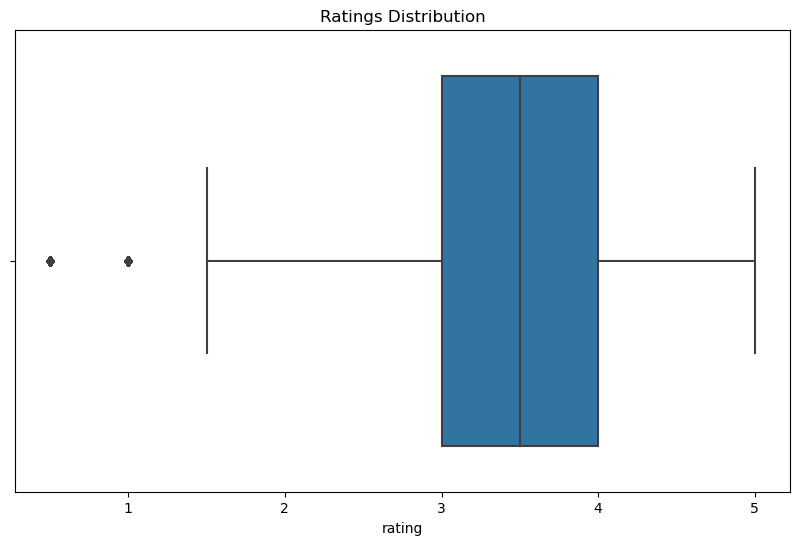

In [21]:
# movies = pd.read_csv('movies.csv')
# ratings = pd.read_csv('ratings.csv')
movie_ratings = pd.merge(ratings, movies, on='movieId')

ratings_summary = movie_ratings['rating'].describe()

IQR = ratings_summary['75%'] - ratings_summary['25%']
lower_bound = ratings_summary['25%'] - 1.5 * IQR
upper_bound = ratings_summary['75%'] + 1.5 * IQR

outliers = movie_ratings[(movie_ratings['rating'] < lower_bound) | (movie_ratings['rating'] > upper_bound)]

print("Outliers:")
print(outliers)

plt.figure(figsize=(10, 6))
sns.boxplot(data=movie_ratings, x='rating')
plt.title("Ratings Distribution")
plt.show()
